# Phase Comparison Script

**This script can be used to plot and compare phases between different chemicals, given their experiment ID's**

## Setup

Importing relevant modules, style type, and setting up functions used to create plots.

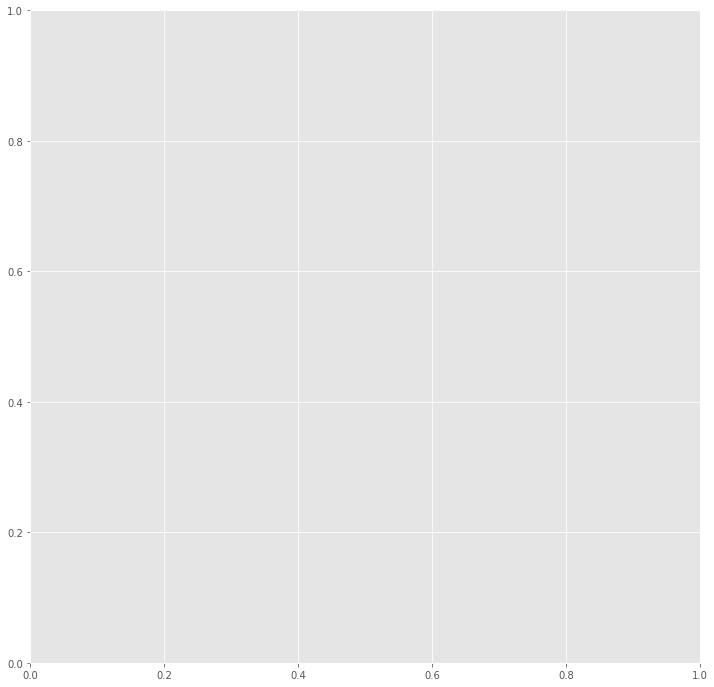

In [7]:
# Necessary modules
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter as sgf
import matplotlib.pyplot as plt
from matplotlib import style
from sniffing_functions import * # Functions specifically written for this project

# Uses ggplot styles, and the qt framework for plotting
style.use("ggplot")

# Setting up plotting environment
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

### Calculating Phase

If you wanted to calculate the phase from raw data (and for some reason it doesn't exist already), run the following cell by populating the exp = [] list with the experiment ID's

In [12]:
exp = [] # Add the experiment ID of the data you want to calculate (i.e. exp = [284, 302, 859])

for i in exp:
    try: 
        df = pd.read_csv("../Scan CSV Files/621.csv".format(i))
        df.drop('Unnamed: 0', axis=1, inplace=True)
        df.set_index("Wavelengths", inplace=True)
    except:
        print("Missing {}.csv".format(i))
    
    sliced = [df.index[500], df.index[1200]] # Wavelengths between 400 and 900
    ft_data = np.fft.fft( (df.loc[sliced[0]:sliced[1], :]).transpose() ) 
    
    R = np.real(ft_data[:, 1])
    I = np.imag(ft_data[:, 1])
    
    phase = I / (R ** 2 + I ** 2) ** 0.5
    phase = sgf(phase, window_length=31, polyorder=3)
    phase = phase/np.sqrt(np.sum(phase**2))

    phase_df = pd.DataFrame(phase)
    phase_df.to_csv("../Scan CSV Files/Phase Derivative/{}.csv".format(i))

NameError: ignored

### Calculating Phase Derivative

You need to have a phase csv file first

In [9]:
exp = [] # Add the experiment ID of the data you want to calculate (i.e. exp = [284, 302, 859])

for i in exp:
    try:
        df = pd.read_csv("../Scan CSV Files/Phase/{}.csv".format(i))
        df.drop('Unnamed: 0', axis=1, inplace=True)
    except:
        print("Missing {}.csv".format(i))
        
    phase = list(df["0"])
    phase_deriv = np.diff(phase) # Calculating phase derivative
    phase_deriv = sgf(phase_deriv, window_length=31, polyorder=3) # Smoothing
    phase_deriv = phase_deriv/np.sqrt(np.sum(phase_deriv**2)) # Normalization
    
    pd_df = pd.DataFrame(phase_deriv)
    pd_df.to_csv("../Scan CSV Files/Phase Derivative/{}.csv".format(i))
    

## Plotting

**All plotting cells follow the same pattern.**

For new experiments, make the following changes: 
* If graphing the phase, use the "graph" function. 
* If graphing the phase derivative, use the "graph_pd" function.
* Change the start/end values to accomodate the new experiment ID's for your chemical.
* Add "Skip" parameter if applicable.
* Change the plot title, legend labels, xticklabels(will change depending on the procedure), and axis labels
* toggle the savefig line if you want to save a figure in the folder "Important Data Images" under the correct procedure folder

### Polar Compounds

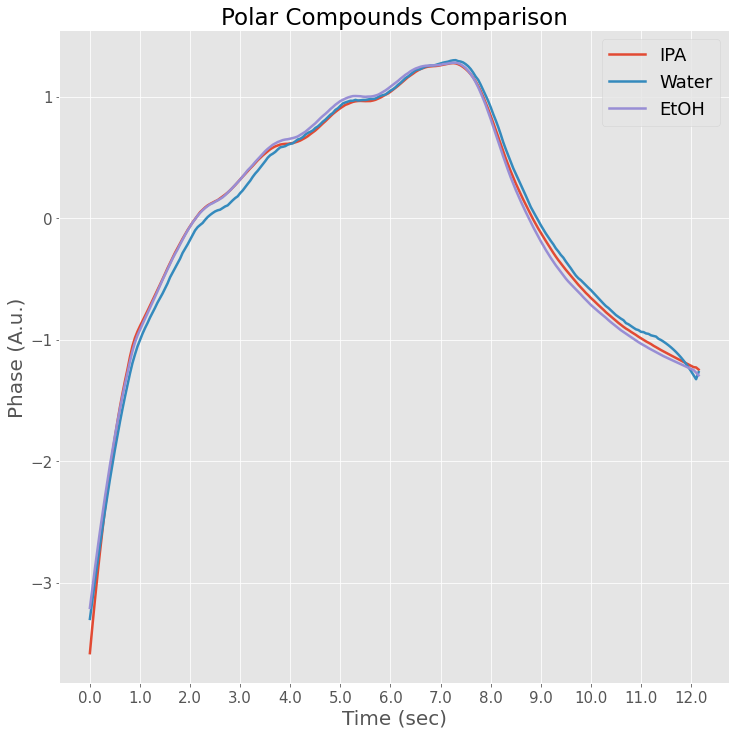

In [10]:
graphs = []
    
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# IPA
graph(152, 179, graphs)
# WATER
graph(153, 180, graphs)
# ETHANOL
graph(154, 181, graphs)

for i in graphs:
    ax.plot(i, linewidth=2.5)

ax.set_title("Polar Compounds Comparison", fontsize=23)
ax.legend(("IPA", "Water", "EtOH"), fontsize=18)
ax.set_xticklabels(np.linspace(0, 12, 13))
ax.set_xticks(np.linspace(0, 240, 13))
ax.set_xlabel("Time (sec)", fontsize=20)
ax.set_ylabel("Phase (A.u.)", fontsize=20)
ax.tick_params(labelsize=15)
# plt.savefig("Important Data Images/Polar Compounds Comparison.png") # toggle this if you want to save
plt.show()

### Nonpolar: C5, C6, C7

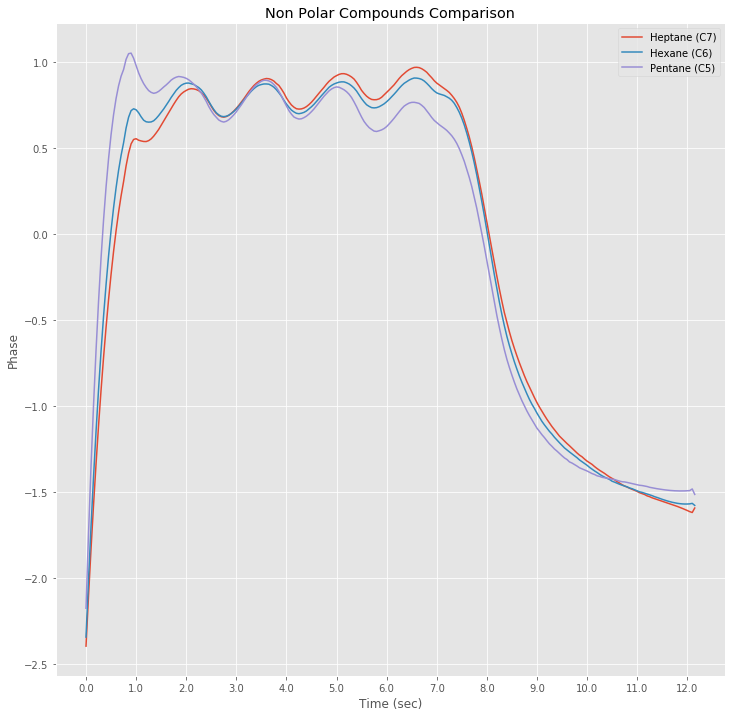

In [ ]:
graphs = []

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# Heptane
graph(182, 206, graphs)
# Hexane
graph(183, 207, graphs)
# Pentane
graph(184, 205,graphs)

for i in graphs:
    ax.plot(i)
    
ax.set_title("Non Polar Compounds Comparison")
ax.legend(("Heptane (C7)", "Hexane (C6)", "Pentane (C5)"))
ax.set_xticklabels(np.linspace(0, 12, 13))
ax.set_xticks(np.linspace(0, 240, 13))
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Phase")
# plt.savefig("Important Data Images/C5 to C7 Nonpolar Compounds.png")
plt.show()



### Nonpolar: C8, C9, C10

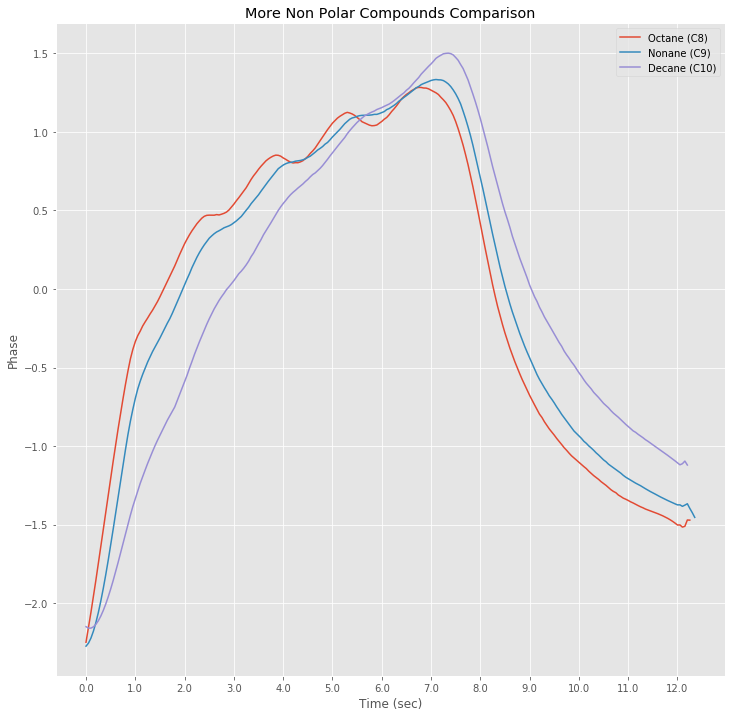

In [ ]:
graphs = []

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# Octane
graph(212, 239, graphs)
# Nonane
graph(213, 240, graphs)
# Decane
graph(214, 241,graphs)

for i in graphs:
    ax.plot(i)
    
ax.set_title("More Non Polar Compounds Comparison")
ax.legend(("Octane (C8)", "Nonane (C9)", "Decane (C10)"))
ax.set_xticklabels(np.linspace(0, 12, 13))
ax.set_xticks(np.linspace(0, 240, 13))
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Phase")
# plt.savefig("Important Data Images/C8 to C10 Nonpolar Compounds.png")
plt.show()



### Nonpolar: C5 to C10 

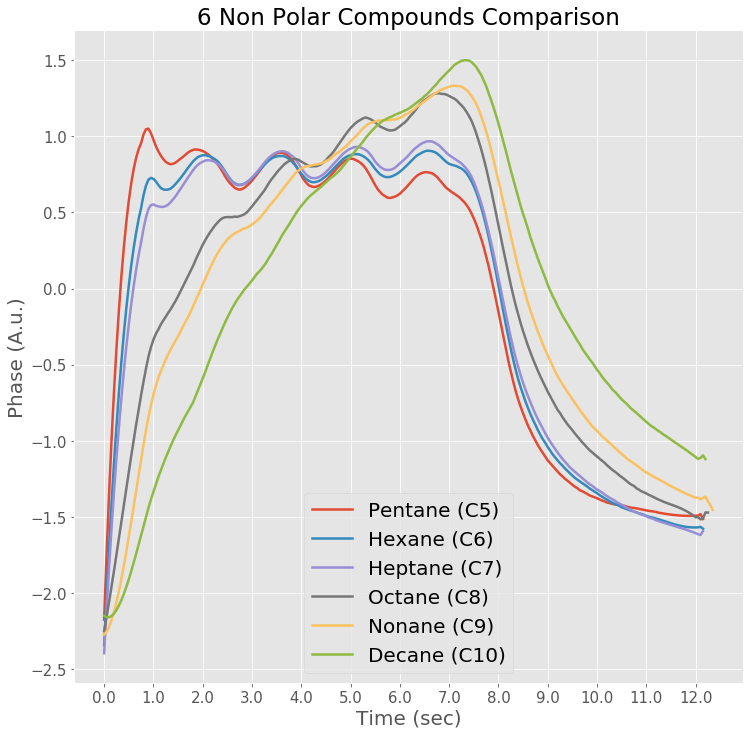

In [ ]:
graphs = []

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# Pentane
graph(184, 205,graphs)
# Hexane
graph(183, 207, graphs)
# Heptane
graph(182, 206, graphs)
# Octane
graph(212, 239, graphs)
# Nonane
graph(213, 240, graphs)
# Decane
graph(214, 241,graphs)

for i in graphs:
    ax.plot(i, linewidth=2.5)
    

ax.set_title("6 Non Polar Compounds Comparison", fontsize=23)
ax.legend(("Pentane (C5)", "Hexane (C6)", "Heptane (C7)", "Octane (C8)", "Nonane (C9)", "Decane (C10)"), fontsize=20)
ax.set_xticklabels(np.linspace(0, 12, 13))
ax.set_xticks(np.linspace(0, 240, 13))
ax.set_xlabel("Time (sec)", fontsize=20)
ax.set_ylabel("Phase (A.u.)", fontsize=20)
ax.tick_params(labelsize=15)
# plt.savefig("Important Data Images/C5 to C10 Nonpolar Compounds.png")
plt.show()



### Pentane and Hexane Mixtures

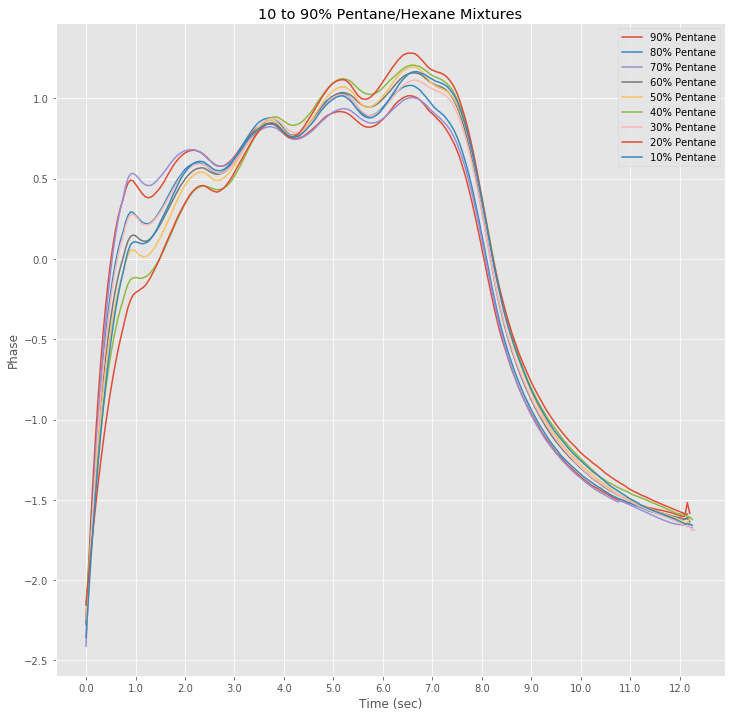

In [ ]:
graphs = []
    
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# # Pentane
# graph(184, 205, graphs)
# Nine
graph(242, 275, graphs, skip=[263])
# Eight
graph(243, 276, graphs, skip=[264])
# Seven
graph(244, 277, graphs, skip=[262, 265])

# Six
graph(310, 337, graphs)
# Five
graph(309, 336, graphs)
# Four
graph(308, 335, graphs)

# Three
graph(280, 307, graphs)
# Two
graph(279, 306, graphs)
# One
graph(278, 305, graphs)

# Hexane
# graph(183, 207, graphs)

for i in graphs:
    ax.plot(i)
    
ax.set_title("10 to 90% Pentane/Hexane Mixtures")
ax.legend(("90% Pentane", "80% Pentane", "70% Pentane", 
           "60% Pentane", "50% Pentane", "40% Pentane", 
           "30% Pentane", "20% Pentane", "10% Pentane" ))

ax.set_xticklabels(np.linspace(0, 12, 13))
ax.set_xticks(np.linspace(0, 240, 13))
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Phase")
# plt.savefig("Important Data Images/10 to 90% Pentane-Hexane Mixtures.png")
plt.show()




### Water-Ethanol Mixtures

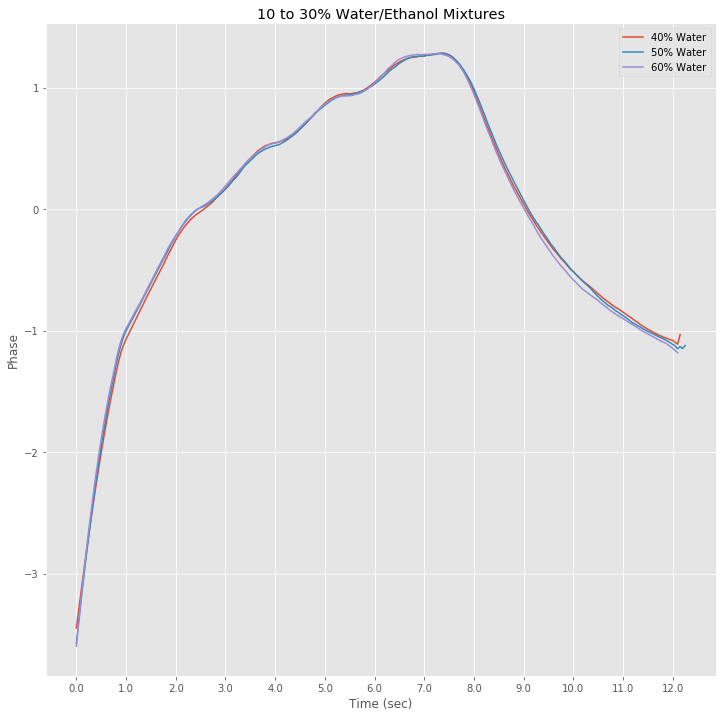

In [ ]:
graphs = []
    
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# 1W-9ET
# graph(338, 365, graphs)
# # 2W-8ET
# graph(339, 366, graphs)
# # 3W-7ET
# graph(340, 367, graphs)
# 4W-6ET
graph(368, 394, graphs)
# 5W-5ET
graph(369, 392, graphs)
# 6W-4ET
graph(370, 393, graphs)

for i in graphs:
    ax.plot(i)
    
ax.set_title("10 to 30% Water/Ethanol Mixtures")
ax.legend((
           "40% Water", "50% Water", "60% Water" ))

ax.set_xticklabels(np.linspace(0, 12, 13))
ax.set_xticks(np.linspace(0, 240, 13))
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Phase")
# plt.savefig("Important Data Images/10 to 30% Water-Ethanol Mixtures.png")
plt.show()


